Import statements, place any extra import statements below.

In [24]:
from core import *

Initialize the Orchestrator class.

In [25]:
orchestrator = Orchestrator()

Enter the name of the category of interest.

In [26]:
orchestrator.category_name()

Text(value='', description='Category:', placeholder='')

Button(description='Submit', style=ButtonStyle())

get_ed_directories() returns a dictionary of directories.
Here is an explanation of this data structure: 
1. The directories object is a list of directories (each of them a dictionary).
2. Each directory in directories, contains a dictionary of data set objects (these are themselves dictionaries).
3. Each data set "object" in each directory contains a dataset key that maps to a dictionary of the following form: {json sample of data KEY: json sample of data VALUE, json of metadata of the data set KEY: json of metadata of the data set VALUE}.

This defines a nested dictionary.

Here is an example:
```python
ed_directories = 
    [
     {"dataset00": 
        {"sample_dataset00" : json object, "md_dataset00": json object},
      "dataset01": 
        {"sample_dataset01" : json object, "md_dataset01": json object},
      ...
     },
     {"dataset10": 
        {"sample_dataset10" : json object, "md_dataset10": json object},
      "dataset01": 
        {"sample_dataset11" : json object, "md_dataset10": json object},
      ...
      },
     {"datasetN0": 
        {"sample_datasetN0" : json object, "md_datasetN0": json object},
      "datasetN-1": 
        {"sample_datasetN1" : json object, "md_datasetN1": json object},
      ...
     }
    ]
```

In [27]:
orchestrator.get_ed_directories()

[]

To save directories, use the cell below.

In [28]:
ed_directories = orchestrator.get_ed_directories()

To access a directory in ed_directories, uncomment the cell below:

In [29]:
# directory_index = ...
# ed_directory = orchestrator.get_ed_directory(directory_index)

# or ed_directory = ed_directories[directory_index]

To access datasets of ed_directories, uncomment the cell below::

In [30]:
# list_of_datasets_of_ed_directory = orchestrator.get_datasets(directory_index)

# or ed_directory.keys()

To get a dataframe of a sample dataset, uncomment the cell below:

In [31]:
# dataset_index = ...
# dataset_key = list_of_datasets_of_ed_directory[dataset_index]
# dataset_dataframe = orchestrator.get_dataset(directory, dataset_key)

# This is NOT the cleanest way to do this, but this is another way:
# or ed_directory = self.ed_directories[directory_index]
# dataset = ed_directory.get(dataset_key)
# key = dataset.keys()[0]
# df = pd.read_json(dataset.get(key))

Now that you are able to parse through ed_directories, you can use datasets to visualize the data.

Depending on the plot of choice:
- Histogram (generates histogram):index of directory (one), key of dataset (one), column name of the corresponding directory (one).
- Scatter (generates scatter plot): index of directory (one), key of dataset (one, column names of the corresponding directory (two).
- Compare Using Scatter (generates a scatter plot of two data sets using common columns in them): indices of directories (two), key of datasets (two), column names of the corresponding directory (two).
- Describe (generates a summary of one dataset): index of directory (one), key of dataset (one).
- Compare Using Columns (generates a summary of two datasets using specific columns): index of directories (two), key of datasets (two), column name of each column for corresponding dataframe (two, one for each).



In [32]:
orchestrator.visualization_parameters()

RadioButtons(description='Method:', options=('histogram', 'scatter', 'compare using scatter', 'describe', 'compare using describe'), value='histogram')

Text(value='', description='Directory 1:', placeholder='')

Text(value='', description='Directory 2:', placeholder='')

Text(value='', description='Dataset 1:', placeholder='')

Text(value='', description='Dataset 2:', placeholder='')

Text(value='', description='Column 1:', placeholder='')

Text(value='', description='Column 2:', placeholder='')

Button(description='Submit', style=ButtonStyle())

Run this cell to visualize using the parameters above.

In [33]:
orchestrator.visualize()

Testing Visualizations

In [34]:
df1 = pd.DataFrame(np.random.randn(50, 4), columns=list('ABCD'))
df2 = pd.DataFrame(np.random.randn(50, 4), columns=list('ABCD'))
df1.head()

,A,B,C,D
0,1.161951,1.022638,-1.216440,0.301129
1,-0.109379,0.924447,0.089390,-1.203603
2,0.923280,-1.086385,0.773102,1.696225
3,0.867828,-0.693228,-0.135803,0.307585
4,0.224455,-0.826879,0.301670,-0.422347


In [35]:
EDComponent = EDComponent()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117d43160>]],
      dtype=object)

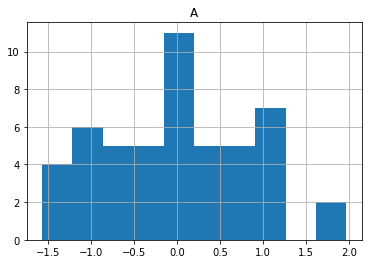

In [36]:
EDComponent.histogram(df1, 'A')

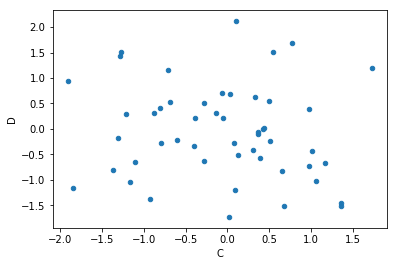

In [37]:
EDComponent.scatter(df1, 'C', 'D')

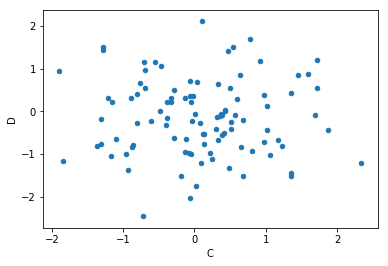

In [38]:
EDComponent.scatter_compare(df1, df2, 'C', 'D')

In [39]:
EDComponent.statistics(df1, 'D')

count    50.000000
mean     -0.052315
std       0.920176
min      -1.739045
25%      -0.660626
50%      -0.144047
75%       0.527922
max       2.124875
Name: D, dtype: float64

In [40]:
EDComponent.statistics_columns(df1, df2, 'A', 'B')

(count    50.000000
 mean     -0.008017
 std       0.861496
 min      -1.574694
 25%      -0.688674
 50%      -0.083520
 75%       0.644888
 max       1.972534
 Name: A, dtype: float64, count    50.000000
 mean      0.102061
 std       1.002294
 min      -2.038870
 25%      -0.557322
 50%       0.151533
 75%       0.778736
 max       2.965618
 Name: B, dtype: float64)